In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utilities import *

/user/ms5941/.local/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
THEME = 'Inflation'

In [3]:
#pd.read_csv('LDA_Outputs/%s_Topics_15.csv' % THEME, index_col=0)

In [4]:
inflation_prob = pd.read_csv('LDA_Outputs/%s_Average_Topic_Probabilities_Per_Year.csv' % THEME, index_col=0)

In [5]:
inflation_state = inflation_prob.loc[3].values #+ inflation_prob.loc[13].values

In [6]:
stand_inflation_state = standarized(inflation_state)[1:]

/user/ms5941/NLP/utilities.py:157: RuntimeWarning: invalid value encountered in true_divide
  std_dev = np.sqrt((np.cumsum(np.power(variable,2)) - np.power(mean,2)*np.arange(1, 26))/np.arange(0, 25))


In [7]:
THEME = 'GDP'

In [8]:
gdp_prob = pd.read_csv('LDA_Outputs/%s_Average_Topic_Probabilities_Per_Year.csv' % THEME, index_col=0)

In [9]:
gdp_state = gdp_prob.loc[2].values

In [10]:
stand_gdp_state = standarized(gdp_state)[1:]

In [11]:
THEME = 'Volatility'

In [12]:
vol_prob = pd.read_csv('LDA_Outputs/%s_Average_Topic_Probabilities_Per_Year.csv' % THEME, index_col=0)

In [13]:
vol_state = vol_prob.loc[2].values

In [14]:
stand_vol_state = standarized(vol_state)[1:]

Now we need to calculate the distance measure between the state vectors

In [15]:
distance_inputs = [stand_inflation_state,stand_gdp_state,stand_vol_state]

In [16]:
distance_inputs

[array([-0.70710678,  1.02386288,  0.21726504,  1.44952722,  1.42592581,
         0.94678583, -1.77378067, -0.77152286, -0.93256665, -0.58147858,
        -0.63363869, -0.03023428, -0.88612463, -1.61550193, -0.48017745,
        -1.58605488, -0.77577712, -1.21798518, -0.82317106, -1.03067013,
        -1.09564076, -0.97231708, -1.18525382, -1.30810615]),
 array([-0.70710678, -0.49561236,  1.26152078, -0.06936659, -0.61560784,
         0.11531469, -1.16238975,  0.52061064,  1.98866129,  0.58811518,
        -0.91061268, -1.19720684, -1.26815436, -0.79628097, -0.47917327,
         2.85562116, -0.55478907, -0.78567974, -1.04831441, -1.0827211 ,
        -0.99841924, -1.03432078, -0.92099306, -0.17710198]),
 array([ 0.70710678, -0.10550639, -0.03656167,  0.18894786, -1.13550368,
        -0.77453009, -1.45437322, -1.04131157, -0.37110331, -0.27331337,
         0.52573727,  0.83292195,  1.38671747,  1.01711632,  1.40196994,
         1.28409435,  2.40546815,  1.24034422,  1.18200867,  2.98140006,


In [17]:
distance = distance(distance_inputs,23)

In [18]:
distance

array([0.80388888, 2.51166701, 2.24703681, 2.82052912, 3.36206065,
       2.74952837, 2.4782363 , 2.01509358, 2.47726573, 1.48490561,
       1.02629834, 1.63626309, 1.32177713, 0.73366033, 1.08367306,
       3.08828975, 1.75961404, 0.7735691 , 1.07832413, 2.40442771,
       2.74227989, 1.3449787 , 1.11542789, 0.        ])

In [19]:
norm_dista = distance/np.max(distance)

In [20]:
norm_dista

array([0.239106  , 0.74706178, 0.66835106, 0.83892869, 1.        ,
       0.81781046, 0.73711826, 0.59936265, 0.73682958, 0.44166533,
       0.30525872, 0.48668459, 0.39314494, 0.21821746, 0.32232407,
       0.91857051, 0.52337368, 0.23008779, 0.3207331 , 0.71516488,
       0.8156545 , 0.40004594, 0.33176912, 0.        ])

In [21]:
pd.DataFrame(norm_dista).to_csv('normalized_distance.csv')

In [22]:
x = np.linspace(0,23,24)

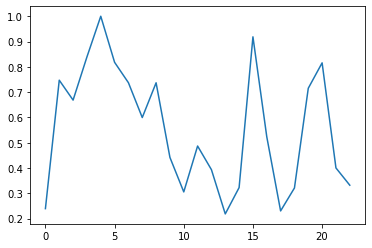

In [23]:
plt.plot(x[:-1],norm_dista[:-1])

In [24]:
# Very simple LOWESS regression

In [25]:
returns = pd.read_csv('returns.csv')

In [26]:
weights = kern(norm_dista[:-1])

In [27]:
forecast_spx = np.sum(weights*returns['SPXR'][1:-1].values)/np.sum(weights)

In [28]:
forecast_spx*100

10.017627003449114

In [29]:
returns['SPXR'][24]*100

16.258922000000002

In [30]:
forecast_dxy = np.sum(weights*returns['DXYR'][1:-1].values)/np.sum(weights)

In [31]:
forecast_dxy*100

1.9659229720659663

In [32]:
returns['DXYR'][24]*100

-6.6937099

In [33]:
forecast_rates = np.sum(weights*returns['10YNR'][1:-1].values)/np.sum(weights)

In [34]:
forecast_rates*100

-1.9655200602042

In [35]:
returns['10YNR'][24]*100

-52.3754889